<H1>Title of ML project: Mushroom Classification</H1>


**Name:** Sheji I

**Organization:** Entri Elevate

**Date:** 20-07-2025


<h3>Problem statement</h3>

<p>The Secondary Mushroom Dataset is a simulated classification dataset derived from real-world mushroom species information. The primary objective is to predict whether a mushroom is edible (e) or poisonous (p) based on a combination of morphological features such as cap diameter, cap shape, gill attachment, stem characteristics, habitat, and season. With over 61,000 instances and a mix of categorical and numerical attributes, the dataset presents a realistic and complex problem that involves handling missing values, high-cardinality categorical features, and non-linear relationships. This binary classification task supports the development and evaluation of machine learning models focused on food safety, species identification, and ecological studies, and is especially relevant for decision-support systems in mycology and public health.</p>

<h3>Objective</h3>

<p>To build a machine learning model that accurately classifies mushrooms as edible or poisonous based on morphological and ecological features, using the Secondary Mushroom Dataset.</p>

<h3>Data Description</h3>

<h5>Source :https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset</h5>

<ol>
<h5>Features (20 features + target, mix of categorical & continuous) </h5>
<li>cap-diameter (continuous, cm)</li>
<li>cap-shape (categorical; bell, conical, etc.)</li>
<li>cap-surface (categorical; smooth, scaly, etc.)</li>
<li>cap-color (categorical; brown, red, white, etc.)</li>
<li>does-bruise-or-bleed (categorical; yes/no)</li>
<li>gill-attachment (categorical)</li>
<li>gill-spacing (categorical)</li>
<li>gill-color (categorical)</li>
<li>stem-height (continuous, cm)</li>
<li>stem-width (continuous, mm)</li>
<li>stem-root (categorical; bulbous, club, etc.)</li>
<li>stem-surface (categorical)</li>
<li>stem-color (categorical)</li>
<li>veil-type (categorical)</li>
<li>veil-color (categorical)</li>
<li>has-ring (categorical; ring present/absent)</li>
<li>ring-type (categorical)</li>
<li>spore-print-color (categorical)</li>
<li>habitat (categorical; woods, urban, etc.)</li>
<li>season (categorical; spring, summer, etc.)</li>
<li>class (target, categorical; edible or poisonous)</li>    
</ol>

<h3>Data Collection</h3>

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df = pd.read_csv("C:/Users/sheji/Desktop/Data science/Mini_Project/MushroomDataset/secondary_data.csv",sep=';')
df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


<h3>Data Preprocessing- Data Cleaning</h3>

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54668 entries, 353 to 60922
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 54668 non-null  object 
 1   cap-diameter          54668 non-null  float64
 2   cap-shape             54668 non-null  object 
 3   cap-surface           54668 non-null  object 
 4   cap-color             54668 non-null  object 
 5   does-bruise-or-bleed  54668 non-null  object 
 6   gill-attachment       54668 non-null  object 
 7   gill-spacing          54668 non-null  object 
 8   gill-color            54668 non-null  object 
 9   stem-height           54668 non-null  float64
 10  stem-width            54668 non-null  float64
 11  stem-color            54668 non-null  object 
 12  has-ring              54668 non-null  object 
 13  ring-type             54668 non-null  object 
 14  habitat               54668 non-null  object 
 15  season                

In [193]:
df.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [194]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [195]:
df.isnull().sum()/len(df) * 100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

In [ ]:
df= df.drop(columns=['stem-root', 'stem-surface','veil-type','veil-color','spore-print-color'])

In [281]:
df.duplicated().sum()

0

In [199]:
# Identify column types
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include='number').columns.tolist()
# Impute missing values
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [200]:
df = df.drop_duplicates().reset_index(drop=True)

In [201]:
df.duplicated().sum()

0

In [202]:
nu=df.select_dtypes("number")
nu.skew()

cap-diameter    3.820274
stem-height     2.050013
stem-width      2.169325
dtype: float64

In [203]:
# Remove outliers using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [204]:
# Address skewed data using log1p
df[numerical_cols] = df[numerical_cols].apply(lambda x: np.log1p(x))

<h3>Exploratory Data Analysis </h3>

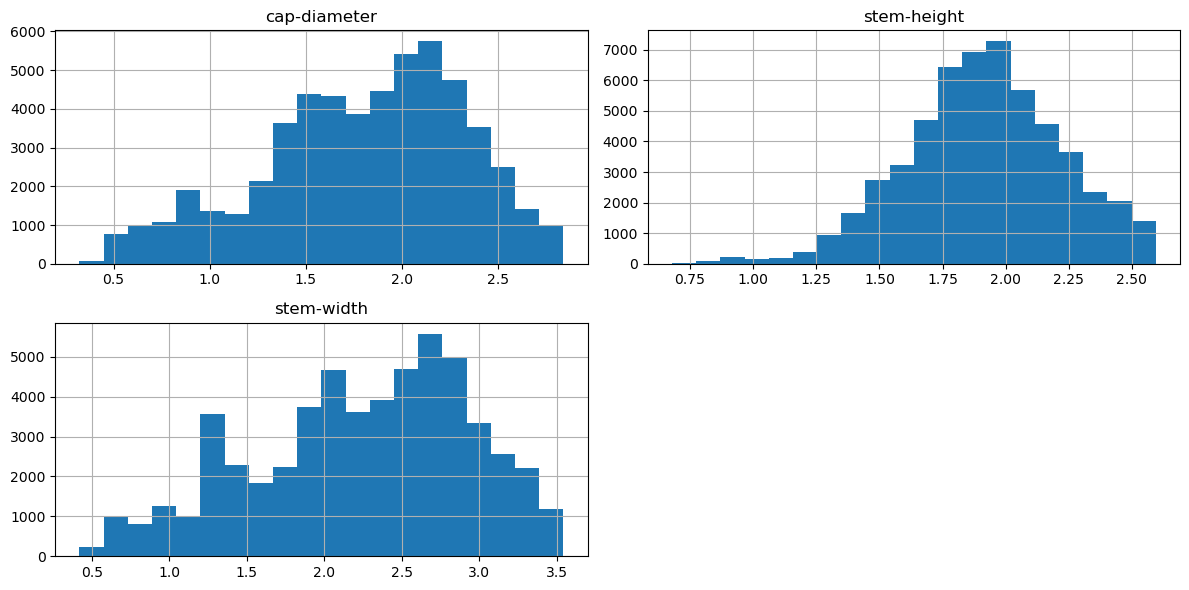

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histograms
df[numerical_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

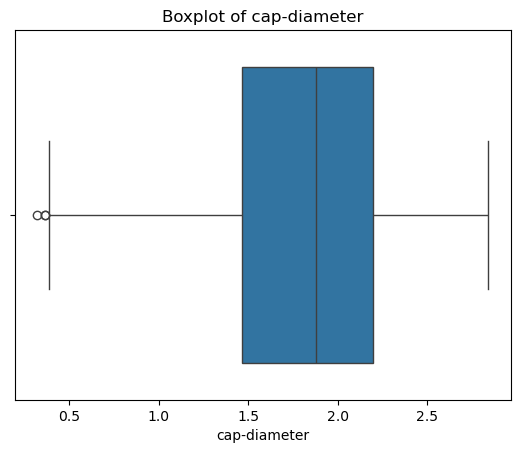

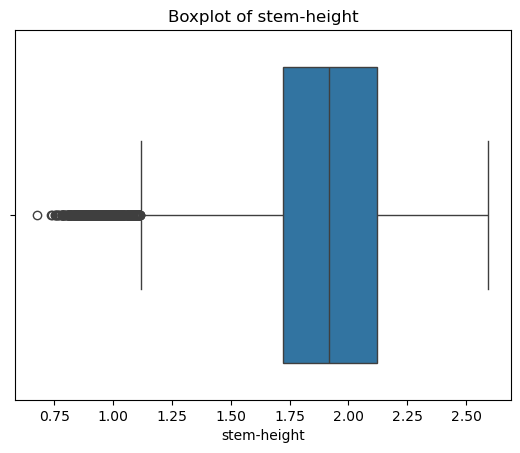

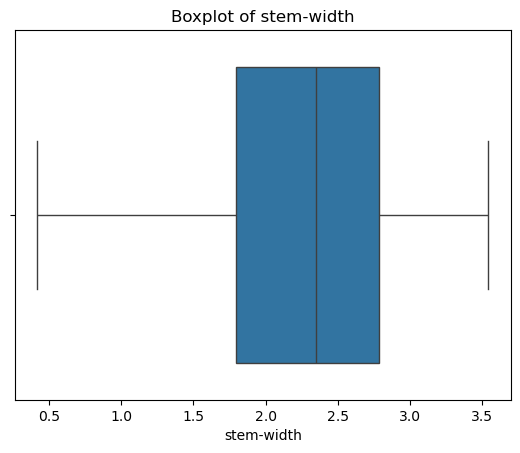

In [207]:
# Boxplots
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

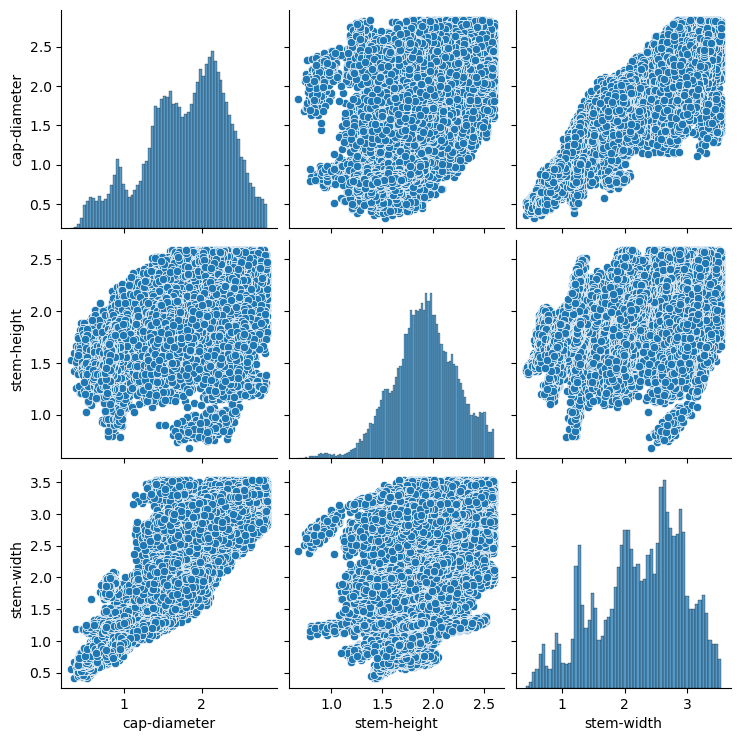

In [208]:
# Pair plot (subset of numerical data)
sns.pairplot(df[numerical_cols[:4]])  # change if you want more columns
plt.show()

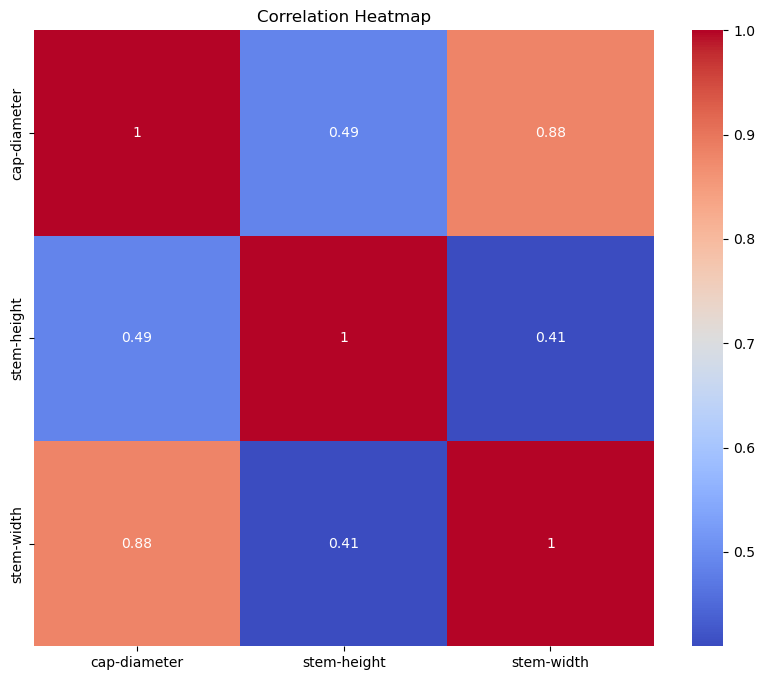

In [209]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

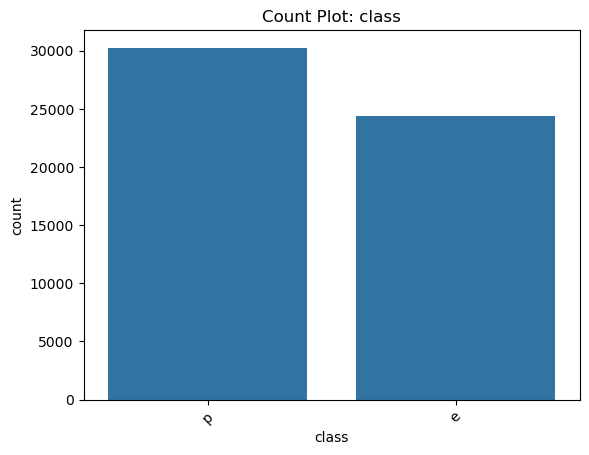

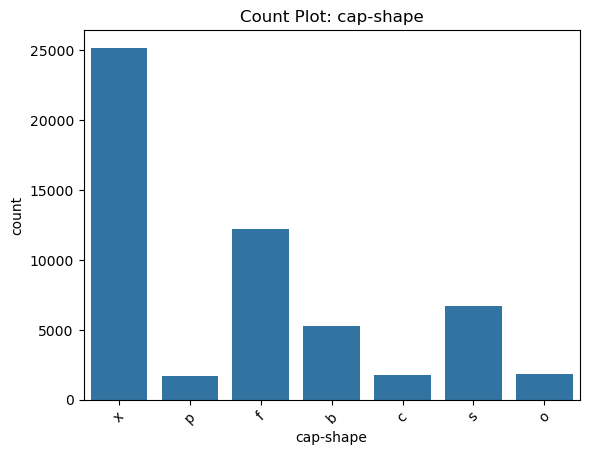

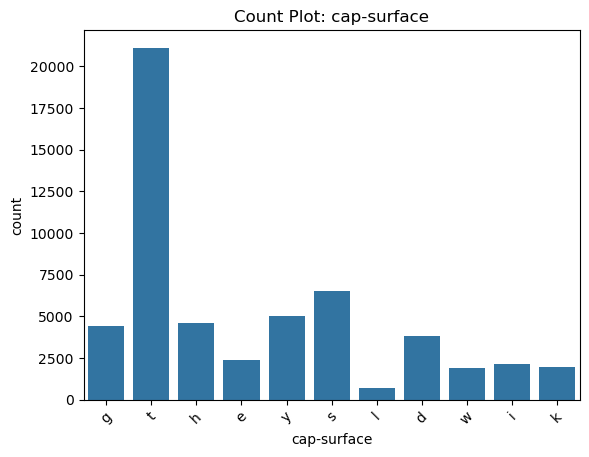

In [210]:
# Count plot (categorical)
for col in categorical_cols[:3]:  # adjust for more
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count Plot: {col}")
    plt.show()

<h3>Feature Engineering</h3>

In [212]:
from sklearn.preprocessing import OneHotEncoder

In [213]:
from sklearn.preprocessing import LabelEncoder
# Copy the cleaned DataFrame
df_fe = df.copy()
# Label encode the target
le = LabelEncoder()
df_fe['class'] = le.fit_transform(df_fe['class'])  # 'e' -> 0, 'p' -> 1
# Identify categorical features (excluding target)
categorical_cols = df_fe.select_dtypes(include='object').columns.tolist()
# One-hot encode categorical features
df_encoded = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)
# Resulting DataFrame shape and feature count
print(f"Encoded dataset shape: {df_fe.shape}")

Encoded dataset shape: (54668, 16)


<h3>Feature Selection</h3>

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
X = df_encoded.drop('class', axis=1) 
y = df_encoded['class']

In [216]:
# Random Forest Feature Importance
model = RandomForestClassifier()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False).head(15).index.tolist()

In [217]:
# SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

In [218]:
# Print top features
print("\nTop 15 features from Random Forest:\n", important_features)
print("Top 15 features from SelectKBest:\n", selected_features)


Top 15 features from Random Forest:
 ['stem-width', 'cap-diameter', 'stem-height', 'stem-color_w', 'gill-spacing_d', 'does-bruise-or-bleed_t', 'gill-color_w', 'gill-attachment_p', 'has-ring_t', 'cap-shape_x', 'gill-attachment_x', 'gill-attachment_d', 'ring-type_z', 'cap-surface_t', 'cap-surface_s']
Top 15 features from SelectKBest:
 ['cap-diameter', 'stem-width', 'cap-surface_k', 'cap-surface_s', 'cap-color_e', 'cap-color_r', 'gill-attachment_e', 'gill-attachment_p', 'gill-spacing_d', 'gill-color_n', 'gill-color_w', 'stem-color_w', 'ring-type_z', 'habitat_g', 'season_w']


* SelectKBest ranks features based on their individual relationship with the target.
* Random Forest evaluates features by how useful they are for splitting data.

<h3>Split Data & Feature Scaling</h3>

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

Training Set Size: (43734, 15)
Testing Set Size: (10934, 15)


In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [223]:
X_train.shape

(43734, 15)

In [224]:
y_train.shape 

(43734,)

In [225]:
X_test.shape

(10934, 15)

In [226]:
y_test.shape

(10934,)

<h3> ML Models</h3>

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "MLP Classifier": MLPClassifier(max_iter=500),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Adaboost": AdaBoostClassifier()
}


In [229]:
def evaluate_model(model, X_test, y_test, model_name, roc_curves):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{model_name}")
    print(f"Accuracy :  {acc:.4f}")
    print(f"Precision:  {prec:.4f}")
    print(f"Recall   :  {rec:.4f}")
    print(f"F1 Score :  {f1:.4f}")
    print("-" * 40)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Edible", "Poisonous"],
                yticklabels=["Edible", "Poisonous"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # ROC Curve Data
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        roc_curves.append((model_name, fpr, tpr, roc_auc))


<h3>Model Evaluation</h3>

Logistic Regression
Accuracy :  0.7125
Precision:  0.7333
Recall   :  0.7588
F1 Score :  0.7458
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67      4855
           1       0.73      0.76      0.75      6079

    accuracy                           0.71     10934
   macro avg       0.71      0.71      0.71     10934
weighted avg       0.71      0.71      0.71     10934



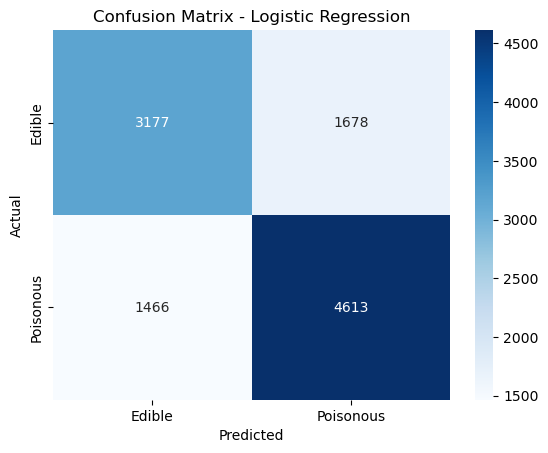

SVM
Accuracy :  0.8746
Precision:  0.8655
Recall   :  0.9169
F1 Score :  0.8905
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      4855
           1       0.87      0.92      0.89      6079

    accuracy                           0.87     10934
   macro avg       0.88      0.87      0.87     10934
weighted avg       0.88      0.87      0.87     10934



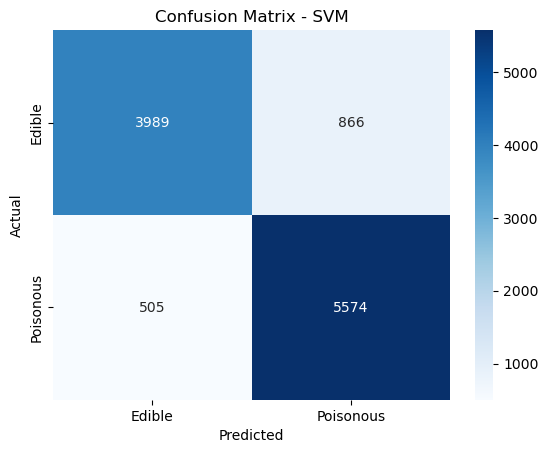

Decision Tree
Accuracy :  0.9091
Precision:  0.9189
Recall   :  0.9174
F1 Score :  0.9182
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      4855
           1       0.92      0.92      0.92      6079

    accuracy                           0.91     10934
   macro avg       0.91      0.91      0.91     10934
weighted avg       0.91      0.91      0.91     10934



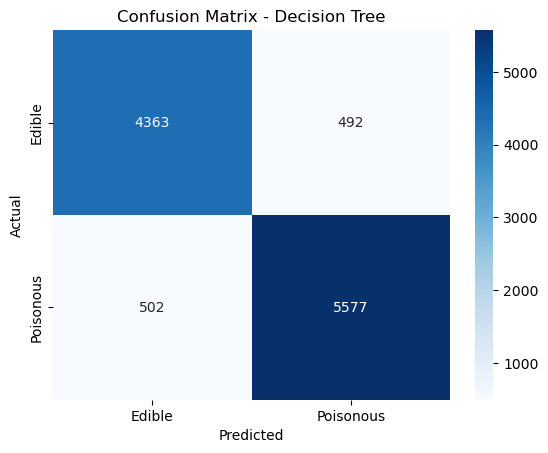

MLP Classifier
Accuracy :  0.9275
Precision:  0.9259
Recall   :  0.9452
F1 Score :  0.9354
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      4855
           1       0.93      0.95      0.94      6079

    accuracy                           0.93     10934
   macro avg       0.93      0.93      0.93     10934
weighted avg       0.93      0.93      0.93     10934



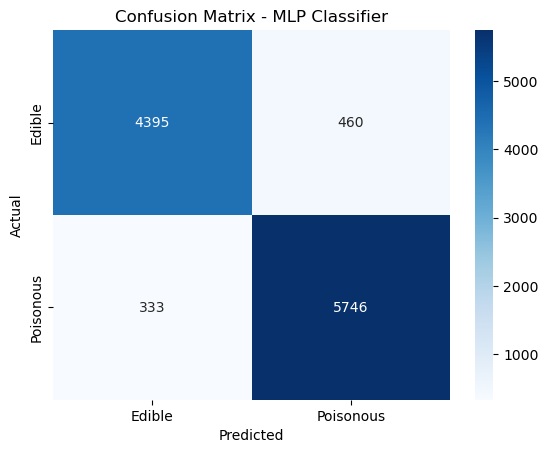

Naive Bayes
Accuracy :  0.5425
Precision:  0.8992
Recall   :  0.1995
F1 Score :  0.3266
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.97      0.65      4855
           1       0.90      0.20      0.33      6079

    accuracy                           0.54     10934
   macro avg       0.70      0.59      0.49     10934
weighted avg       0.72      0.54      0.47     10934



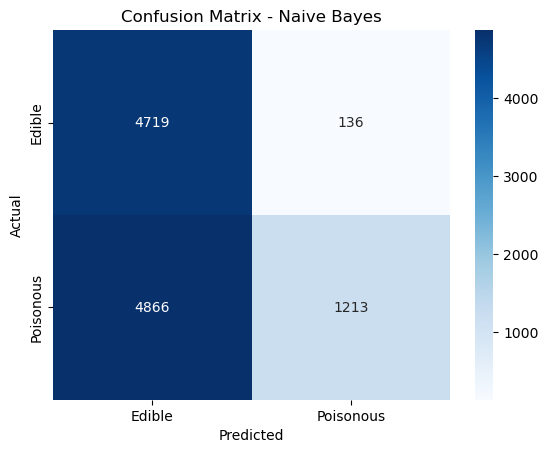

Random Forest
Accuracy :  0.9286
Precision:  0.9334
Recall   :  0.9385
F1 Score :  0.9359
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      4855
           1       0.93      0.94      0.94      6079

    accuracy                           0.93     10934
   macro avg       0.93      0.93      0.93     10934
weighted avg       0.93      0.93      0.93     10934



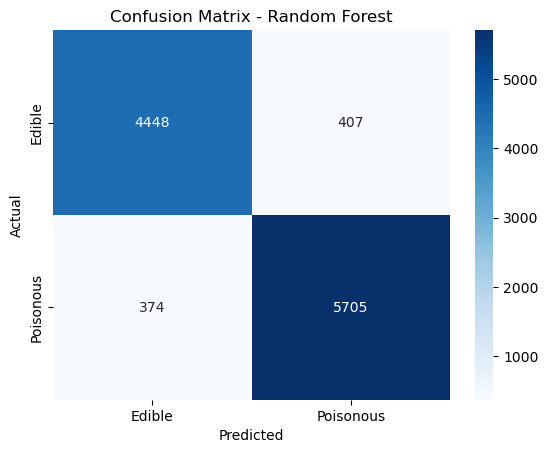

KNN
Accuracy :  0.9290
Precision:  0.9353
Recall   :  0.9372
F1 Score :  0.9362
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      4855
           1       0.94      0.94      0.94      6079

    accuracy                           0.93     10934
   macro avg       0.93      0.93      0.93     10934
weighted avg       0.93      0.93      0.93     10934



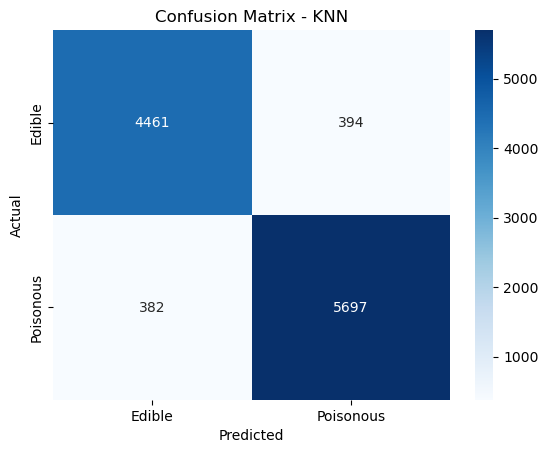

Gradient Boost
Accuracy :  0.8469
Precision:  0.8543
Recall   :  0.8737
F1 Score :  0.8639
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83      4855
           1       0.85      0.87      0.86      6079

    accuracy                           0.85     10934
   macro avg       0.85      0.84      0.84     10934
weighted avg       0.85      0.85      0.85     10934



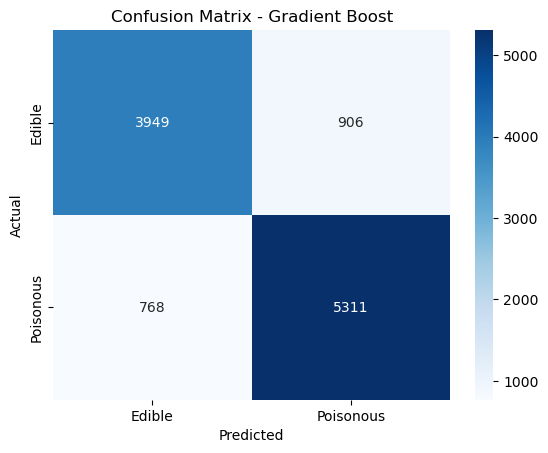

C:\Users\sheji\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost
Accuracy :  0.7493
Precision:  0.7732
Recall   :  0.7771
F1 Score :  0.7751
----------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.72      4855
           1       0.77      0.78      0.78      6079

    accuracy                           0.75     10934
   macro avg       0.75      0.75      0.75     10934
weighted avg       0.75      0.75      0.75     10934



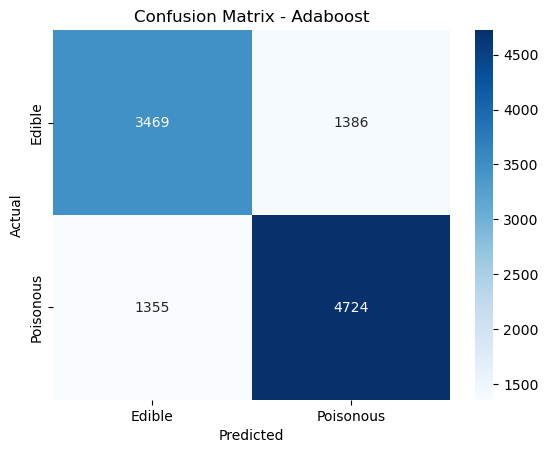

hi


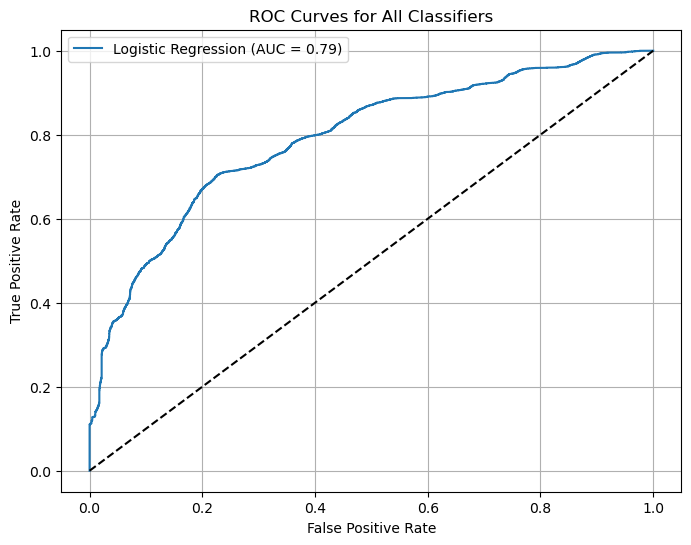

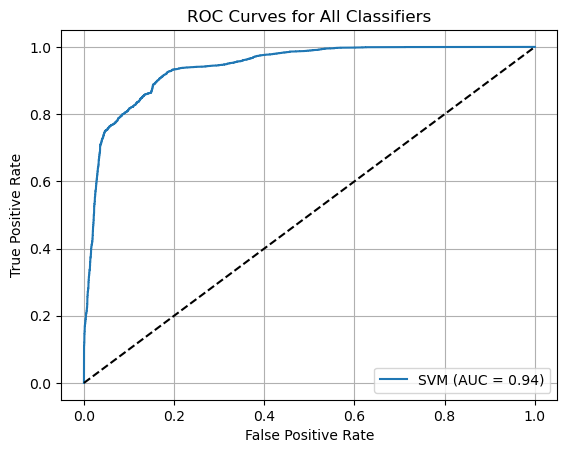

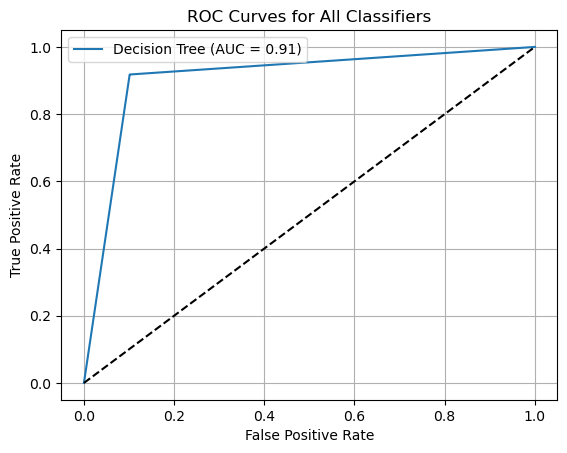

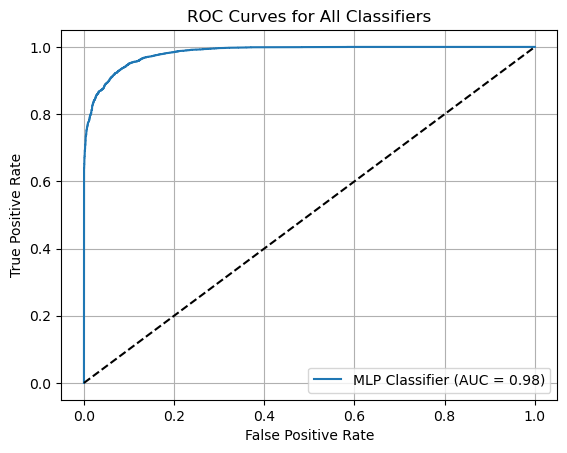

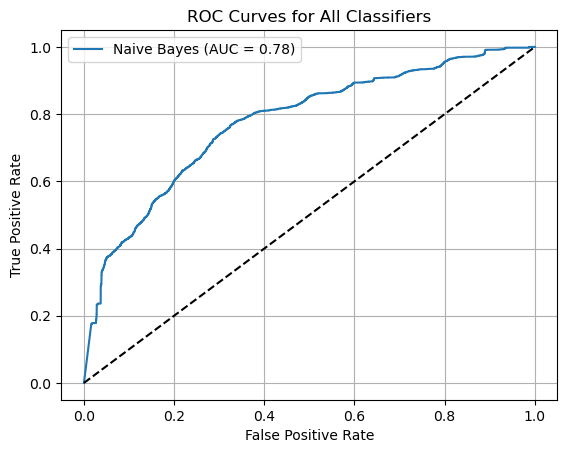

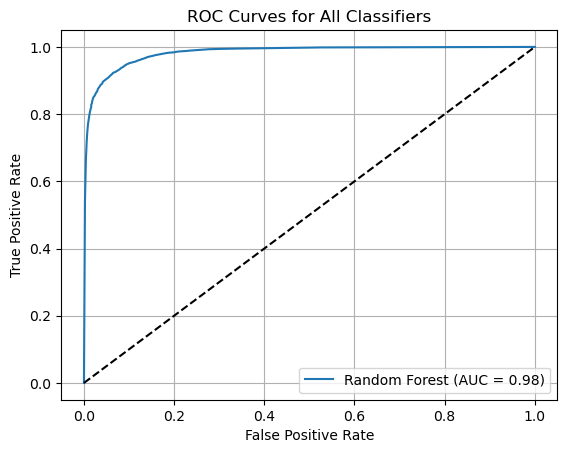

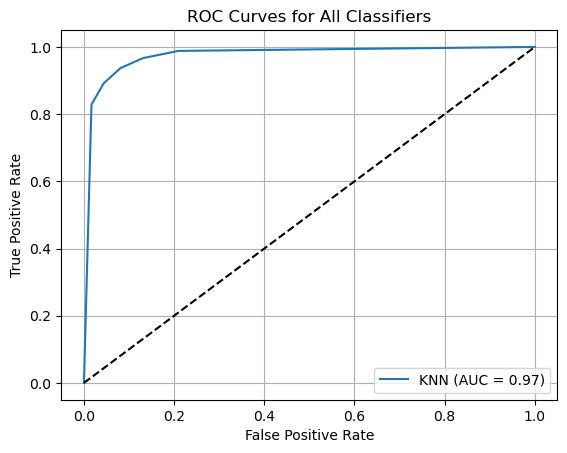

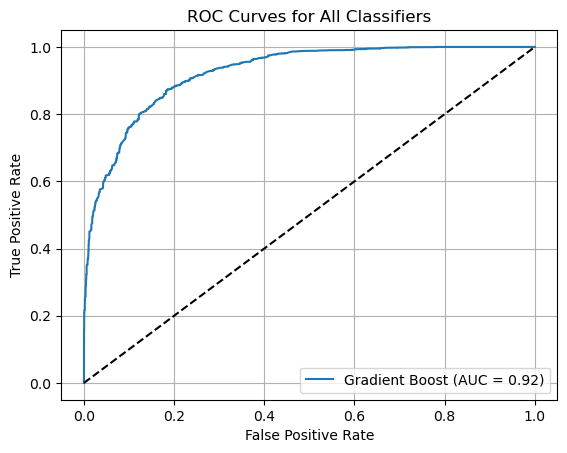

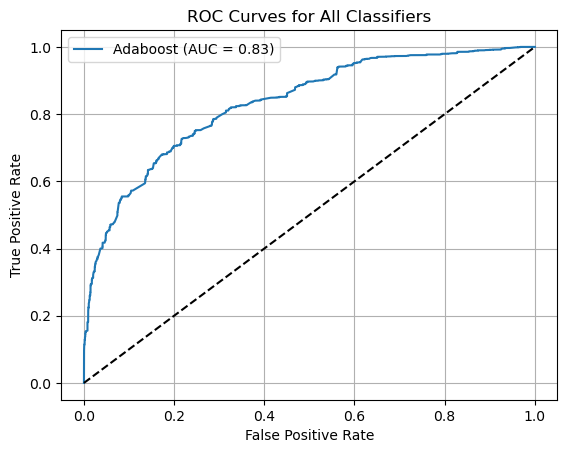

In [231]:
roc_curves = []
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    evaluate_model(clf, X_test_scaled, y_test, name, roc_curves)
# Plot all ROC curves together
plt.figure(figsize=(8, 6))
print("hi")
for name, fpr, tpr, auc_score in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curves for All Classifiers")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

<h5>Reccomendations</h5>
Random Forest or Gradient Boosting: Best performance, interpretability, and low risk.
KNN or Naive Bayes: Less robust.
If F1-score < 0.90: tuning or feature optimization needed.
Use ROC-AUC > 0.95 as threshold for acceptable model.

<h3>Hyperparameter tuning and Pipeline</h3>

In [234]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])
# Define grid of hyperparameters
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}
# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best params and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best Score: 0.9364567449880761
Test Accuracy: 0.9346991037131882


In [235]:
import joblib
# Save the best model (pipeline + trained params)
joblib.dump(best_model, 'mushroom_classifier_model.pkl')
print("Model saved as 'mushroom_classifier_model.pkl'")

Model saved as 'mushroom_classifier_model.pkl'


In [283]:
# Simulated unseen mushroom samples (2 rows)
mushroom_data = {
    "cap-diameter": [5.8, 4.5],         # continuous feature
    "stem-width": [1.2, 1.1],           # continuous feature
    "cap-surface_k": [0, 1],            # one-hot encoded surface type 'k'
    "cap-surface_s": [1, 0],            # one-hot encoded surface type 's'
    "cap-color_e": [0, 1],              # one-hot encoded cap color 'e'
    "cap-color_r": [1, 0],              # one-hot encoded cap color 'r'
    "gill-attachment_e": [0, 1],        # one-hot encoded gill-attachment 'e'
    "gill-attachment_p": [1, 0],        # one-hot encoded gill-attachment 'p'
    "gill-spacing_d": [0, 1],           # one-hot encoded gill-spacing 'd'
    "gill-color_n": [1, 0],             # one-hot encoded gill color 'n'
    "gill-color_w": [0, 1],             # one-hot encoded gill color 'w'
    "stem-color_w": [1, 0],             # one-hot encoded stem color 'w'
    "ring-type_z": [0, 1],              # one-hot encoded ring type 'z'
    "habitat_g": [1, 0],                # one-hot encoded habitat 'g'
    "season_w": [0, 1]                  # one-hot encoded season 'w'
}
unseen_mushrooms = pd.DataFrame(mushroom_data)
print(unseen_mushrooms)

   cap-diameter  stem-width  cap-surface_k  cap-surface_s  cap-color_e  \
0           5.8         1.2              0              1            0   
1           4.5         1.1              1              0            1   

   cap-color_r  gill-attachment_e  gill-attachment_p  gill-spacing_d  \
0            1                  0                  1               0   
1            0                  1                  0               1   

   gill-color_n  gill-color_w  stem-color_w  ring-type_z  habitat_g  season_w  
0             1             0             1            0          1         0  
1             0             1             0            1          0         1  


In [308]:
import joblib
model = joblib.load("mushroom_classifier_model.pkl")

In [310]:
# Make predictions
predictions = model.predict(unseen_mushrooms)
# Output results
print("Predictions on Unseen Data:", predictions)

Predictions on Unseen Data: [1 1]


In [314]:
from sklearn.preprocessing import LabelEncoder
predictions = le.inverse_transform(predictions)
print("Predictions on Unseen Data:", predictions)

Predictions on Unseen Data: ['p' 'p']


<h2>Conclusion</h2>
<p>In this project, we successfully developed a machine learning pipeline to classify mushrooms as edible or poisonous based on various physical and environmental features. The dataset underwent thorough data cleaning, exploratory data analysis, feature engineering, and feature selection using methods like Random Forest importance and SelectKBest.</p>
<p>We implemented and evaluated multiple classification models including:</p>

 <ul><li>Logistic Regression</li><li> Support Vector Machine (SVM)</li>
     <li>Decision Tree</li><li>Random Forest</li><li>K-Nearest Neighbors (KNN)</li><li>Gradient Boosting</li>
     <li>Naive Bayes</li><li>MLP Classifier</li><li>AdaBoost</li></ul>
<p>Among these, Random Forest and Gradient Boosting classifiers achieved the highest accuracy, demonstrating strong generalization capabilities. Proper hyperparameter tuning and the use of pipelines further enhanced model performance and reproducibility.</p>

<h2>Limitations</h2>
<ul><li> Some categorical values had high cardinality and required careful encoding.</li>
    <li>Feature interaction effects might not be fully captured without more advanced techniques like deep learning.</li>
    <li>Some features had significant missing values, and dropping them might have slightly reduced the overall feature richness.</li>
</ul>

<h2>Future Work</h2>
<ul><li>Explore deep learning models such as neural networks or CNNs for more complex feature interactions.</li>
<li>Implement real-time prediction API for user-uploaded mushroom descriptions.</li>
<li>Continuously retrain the model with new data to adapt to potential environmental or species changes.</li></ul>